## 1. Imports of libraries

In [1]:
# Importing the required libraries for data handling, visualization, and modeling.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Setting a simple global visual style and default figure size for all plots.
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

## 2. Checking versions for reproducibility

In [2]:
# Printing library versions for reproducibility.
import sklearn
import sys

print("Python version :", sys.version.split()[0])
print("NumPy version  :", np.__version__)
print("Pandas version :", pd.__version__)
print("scikit-learn   :", sklearn.__version__)
print("Seaborn        :", sns.__version__)

Python version : 3.12.3
NumPy version  : 1.26.4
Pandas version : 2.2.2
scikit-learn   : 1.5.1
Seaborn        : 0.13.2


## 3. Loading the dataset and Previewing and Preprocessing

In [7]:
# Loading the Breast Cancer Wisconsin (Diagnostic) dataset from scikit-learn
cancer = datasets.load_breast_cancer()

X = cancer.data # (X contains numeric features, which are the inputs for the dataset)  

y = cancer.target   # (Y contains the binary labels, the target that is [0 = malignant, 1 = benign])    

In [9]:
# Creating a DataFrame for exploration and easier plotting 
feature_names = cancer.feature_names
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Previewing the first few rows to review the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
# Checking the overall shape of the dataset (rows and columns)
print("Shape:", df.shape)

Shape: (569, 31)


In [15]:
# Reviewing data types and non-null counts to confirm structure and detect obvious issues
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error   

In [17]:
# Verifying that there are no missing values before modeling
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [19]:
# Getting descriptive statistics (mean, std, min, max, quartiles) for all numeric features
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


target
1    357
0    212
Name: count, dtype: int64


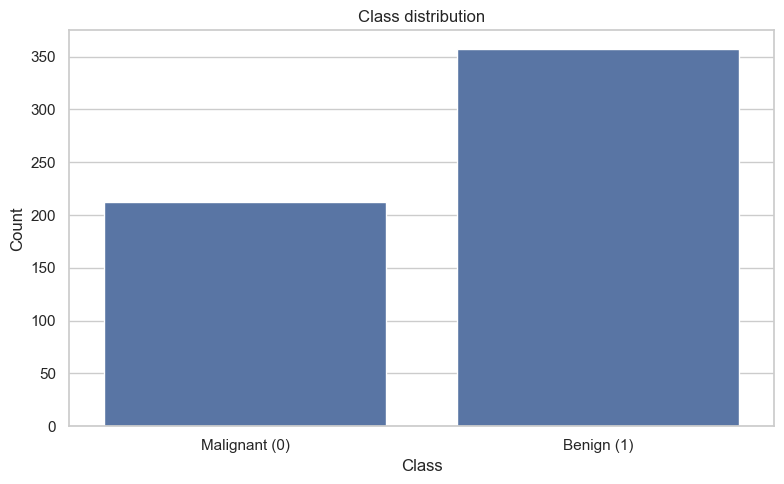

In [21]:
# Inspecting the distribution of the target variable to check for any class imbalance
print(df["target"].value_counts())

# Plotting the count of malignant vs benign cases to visualize class balance
plt.figure()
sns.countplot(x="target", data=df)
plt.xticks([0, 1], ["Malignant (0)", "Benign (1)"])
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

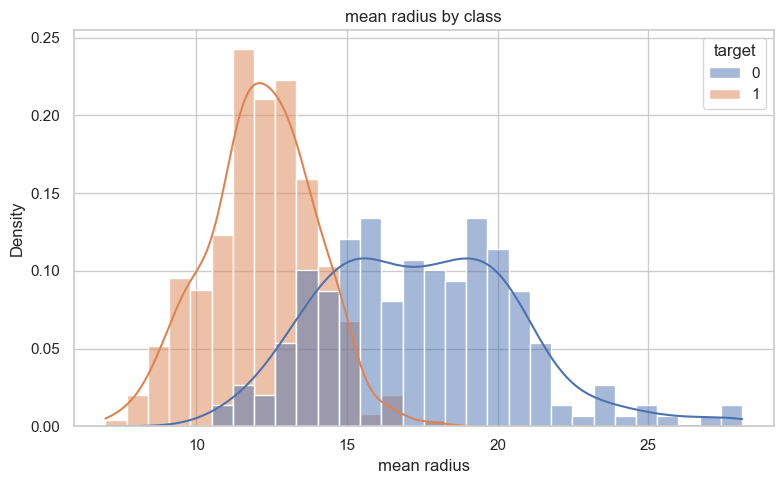

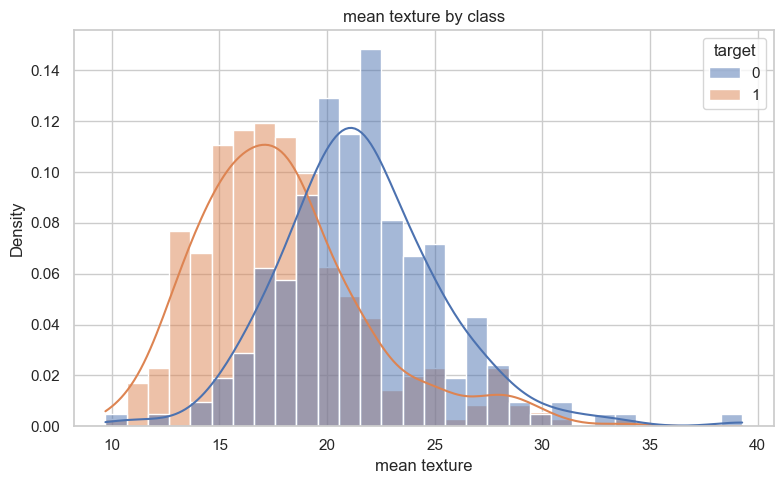

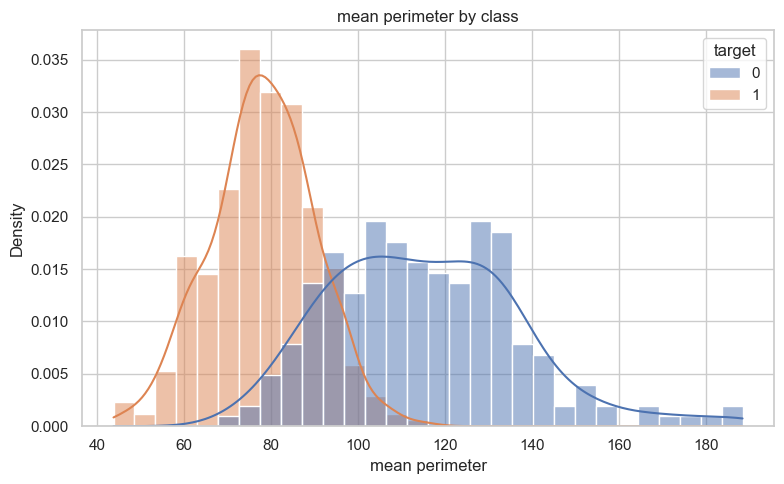

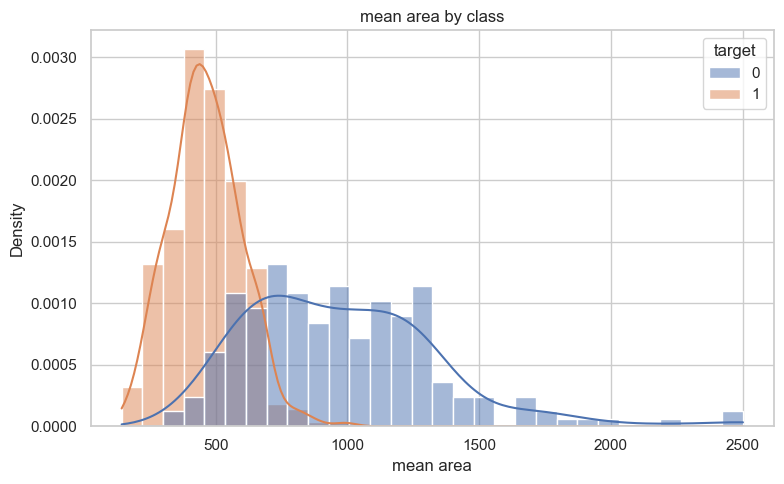

In [23]:
# Plotting distributions for a few key features by class to examine the class variations and understand the separation patterns
selected_features = ["mean radius", "mean texture", "mean perimeter", "mean area"]

for feat in selected_features:
    plt.figure()
    sns.histplot(
        data=df,
        x=feat,
        hue="target",
        bins=30,
        kde=True,
        stat="density",
        common_norm=False
    )
    plt.title(f"{feat} by class")
    plt.tight_layout()
    plt.show()

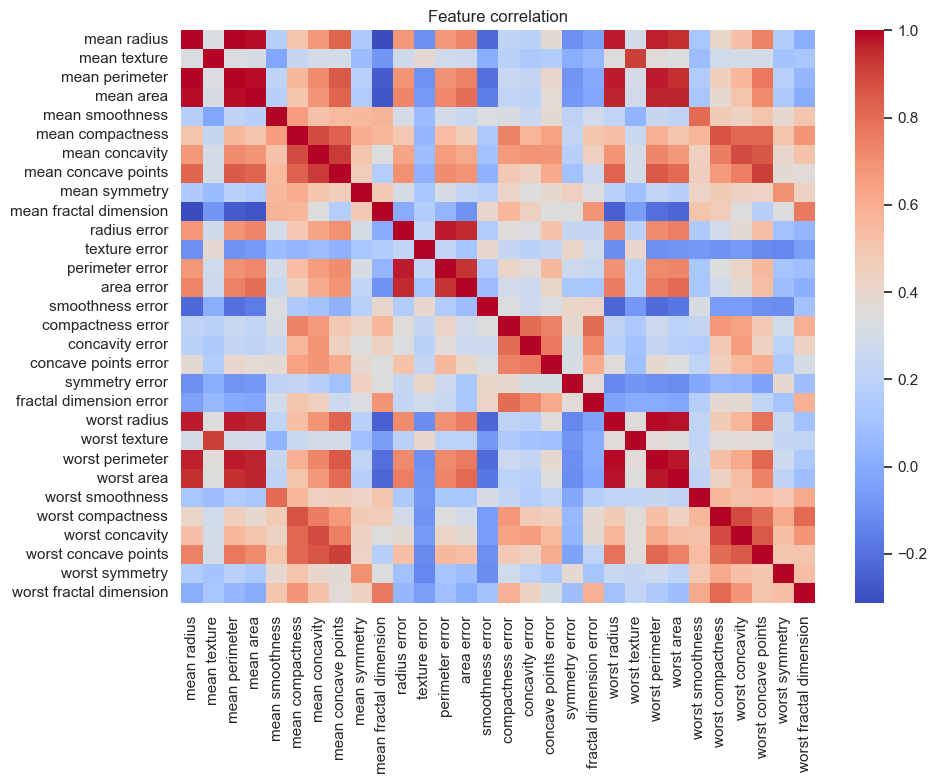

In [27]:
# Computing the correlation matrix among features, excluding the target
corr = df.drop(columns=["target"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", cbar=True,
            xticklabels=feature_names, yticklabels=feature_names)
plt.title("Feature correlation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4. Defining the Model, sampling, Hyperparameter tuning and Model evaluation

In [33]:
# Separating input features X and target labels y for modeling
X = df.drop(columns=["target"]).values
y = df["target"].values

In [35]:
# Splitting the data into training and test sets (80/20) with stratification to preserve the class proportions in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (455, 30)
Test shape: (114, 30)


In [37]:
# Defining the model - Random Forest classifier 

rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Hyperparameter grid for tuning tree size and splitting 
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# Stratified 5-fold cross-validation to preserve class balance in each fold
cv_strategy = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [39]:
# Grid search (5-fold CV, accuracy) to tune Random Forest hyperparameters.
rf_grid = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid_rf,
    scoring="accuracy",
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

# Fit grid search on the training data.
rf_grid.fit(X_train, y_train)

print("Best params:", rf_grid.best_params_)
print("Best CV accuracy: {:.4f}".format(rf_grid.best_score_))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\peter\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV accuracy: 0.9648


In [40]:
# Getting the best model from grid search and predicting on the test set
best_rf_model = rf_grid.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Computing main classification metrics on the test data
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Building the confusion matrix and extracting TN, FP, FN, TP
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculating sensitivity (TPR) and specificity (TNR) from the confusion matrix
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Accuracy :", round(test_accuracy, 4))
print("Precision:", round(test_precision, 4))
print("Recall   :", round(test_recall, 4))
print("F1-score :", round(test_f1, 4))
print("Sensitivity (TPR):", round(sensitivity, 4))
print("Specificity (TNR):", round(specificity, 4))
print("\nConfusion matrix:\n", cm)

# Printing a detailed per-class precision, recall, and F1 report
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

Accuracy : 0.9474
Precision: 0.9583
Recall   : 0.9583
F1-score : 0.9583
Sensitivity (TPR): 0.9583
Specificity (TNR): 0.9286

Confusion matrix:
 [[39  3]
 [ 3 69]]

Classification report:

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        42
      benign       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



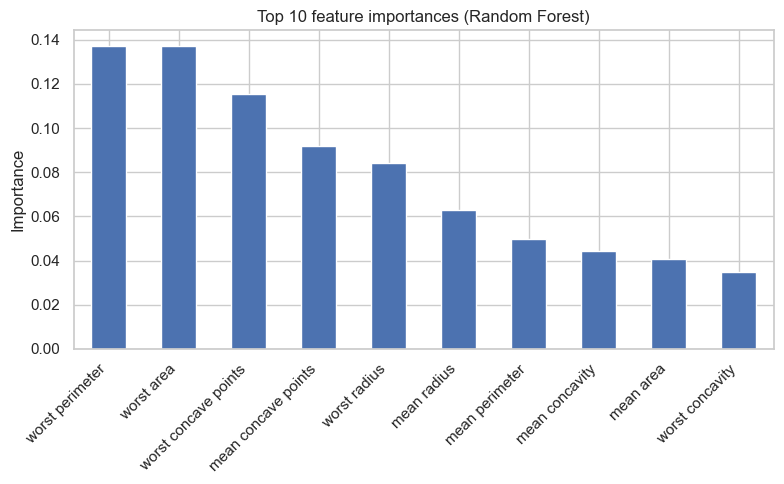

In [43]:
# Extracting feature importances from the trained Random Forest model
importances = pd.Series(best_rf_model.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)

# Plotting the top 10 most important features.
top_n = 10
plt.figure(figsize=(8, 5))
importances.head(top_n).plot(kind="bar")
plt.title("Top 10 feature importances (Random Forest)")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()